## Libraries:

In [1]:
import matplotlib.pyplot as plt
from glob import glob
import cv2
import random
import os
%matplotlib inline

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.utils import plot_model

from IPython.display import SVG, Image
import tensorflow as tf

## Loading Images:

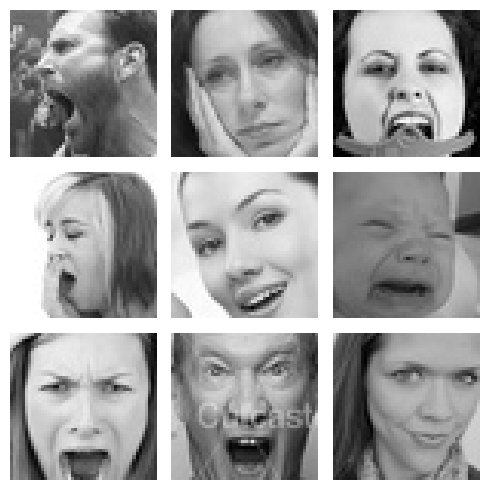

In [8]:
# Load image paths
images = glob("emotion_train/**/**", recursive=True)

# Select 9 random images
selected_images = random.sample(images, 9)

# Create the figure
plt.figure(figsize=(5, 5))  # Adjust figsize for a smaller size

# Loop to display images
for i, image in enumerate(selected_images):
    plt.subplot(3, 3, i + 1)  # Create a 3x3 grid and place each image
    img = cv2.imread(image)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
    plt.imshow(img)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Image Data Generator: 

In [11]:
img_size = 48
batch_size = 64
datagen_train = ImageDataGenerator()
train_generator = datagen_train.flow_from_directory("emotion_train/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

datagen_validation = ImageDataGenerator()
validation_generator = datagen_train.flow_from_directory("emotion_test/",
                                                   target_size = (img_size,img_size),
                                                   color_mode = "grayscale",
                                                   batch_size = batch_size,
                                                   class_mode = "categorical",
                                                   shuffle = True)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


## Model: 

In [12]:
def Convolution(input_tensor, filters, kernel_size):
    x = Conv2D(filters = filters, kernel_size = kernel_size, padding = "same")(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size = (2,2))(x)
    x = Dropout(0.25)(x)
    
    return x

In [13]:
def Dense_f(input_tensor, nodes):
    x = Dense(nodes)(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = Dropout(0.25)(x)
    
    return x

In [14]:
def model_fer(input_shape):
    inputs = Input(input_shape)
    conv_1 = Convolution(inputs,32,(3,3))
    conv_2 = Convolution(conv_1,64,(5,5))
    conv_3 = Convolution(conv_2,128,(3,3))

    flatten = Flatten()(conv_3)
    
    dense_1 = Dense_f(flatten,256)

    output  = Dense(7, activation="softmax")(dense_1)
    model  =  Model(inputs=[inputs],outputs = [output])
    
    model.compile(loss=['categorical_crossentropy'] , optimizer = 'adam' , metrics =["accuracy"])

    return model

In [15]:
model = model_fer((48,48,1))
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 48, 48, 1)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 48, 48, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 48, 48, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 48, 48, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 24, 24, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 24, 24, 64)          │          51,264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 24, 24, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 24, 24, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 12, 12, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 6, 6, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 4608)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       1,179,904 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 1,309,063 (4.99 MB)

 Trainable params: 1,308,103 (4.99 MB)

 Non-trainable params: 960 (3.75 KB)

In [17]:
epochs = 15
steps_per_epoch = train_generator.n//train_generator.batch_size
validation_steps = validation_generator.n//validation_generator.batch_size

checkpoint = ModelCheckpoint("model.weights.h5", monitor  ='val_accuracy', save_weights_only = True, mode = 'max', verbose =1)
callbacks = [checkpoint]

In [18]:
history = model.fit(
x = train_generator,
steps_per_epoch = steps_per_epoch,
epochs = epochs,
validation_data = validation_generator,
validation_steps = validation_steps,
callbacks = callbacks)

Epoch 1/15


F:\Anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 476ms/step - accuracy: 0.3050 - loss: 1.8493
Epoch 1: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 254s 554ms/step - accuracy: 0.3051 - loss: 1.8490 - val_accuracy: 0.3913 - val_loss: 1.6268
Epoch 2/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 52s 116ms/step - accuracy: 0.4375 - loss: 1.4903
Epoch 2: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 220us/step - accuracy: 0.4375 - loss: 1.4903 - val_accuracy: 0.4000 - val_loss: 1.5765
Epoch 3/15


F:\Anaconda\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step - accuracy: 0.4574 - loss: 1.4232
Epoch 3: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 57s 127ms/step - accuracy: 0.4574 - loss: 1.4232 - val_accuracy: 0.4407 - val_loss: 1.5541
Epoch 4/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 51s 114ms/step - accuracy: 0.4531 - loss: 1.4489
Epoch 4: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 171us/step - accuracy: 0.4531 - loss: 1.4489 - val_accuracy: 0.4000 - val_loss: 1.7986
Epoch 5/15
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.5164 - loss: 1.2801
Epoch 5: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 58s 129ms/step - accuracy: 0.5164 - loss: 1.2801 - val_accuracy: 0.5007 - val_loss: 1.3065
Epoch 6/15
  1/448 ━━━━━━━━━━━━━━━━━━━━ 55s 123ms/step - accuracy: 0.5781 - loss: 1.1914
Epoch 6: saving model to model.weights.h5
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 209us/step - accuracy: 0.5781 - loss: 1.1914 - val_accuracy: 0.5000 - val_loss: 1.1667
Epoch 7/15


In [19]:
model.evaluate(validation_generator)

113/113 ━━━━━━━━━━━━━━━━━━━━ 4s 36ms/step - accuracy: 0.5741 - loss: 1.1446


[1.130842924118042, 0.5775982141494751]

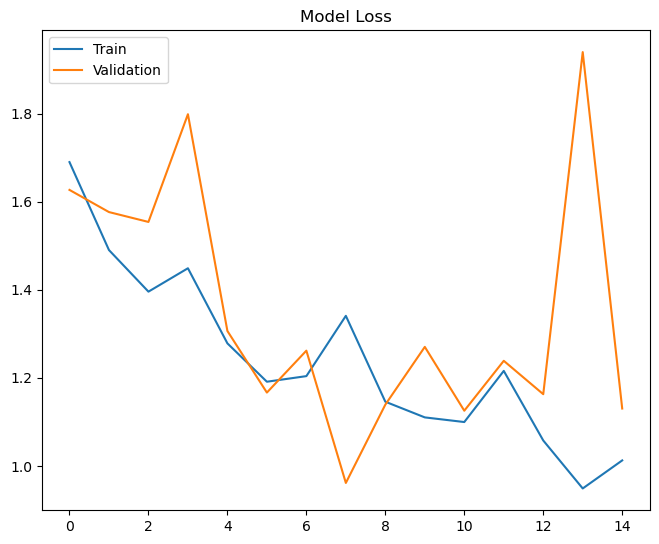

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

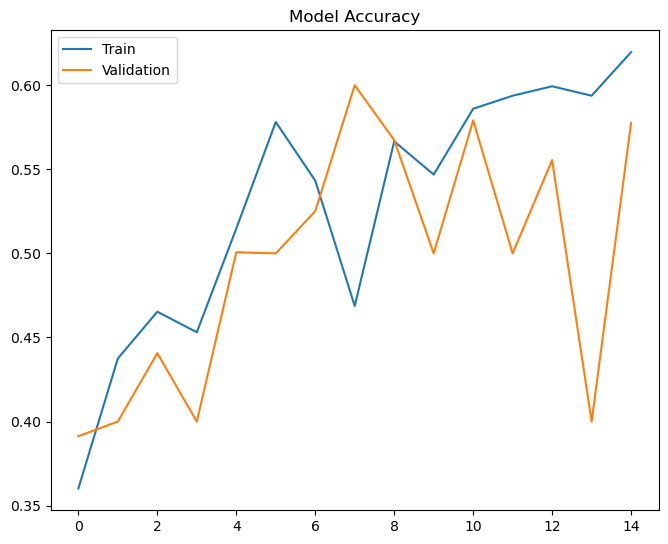

In [21]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.legend(['Train','Validation'],loc = 'upper left')
plt.subplots_adjust(top=1.0,bottom=0.0,right =0.95,left=0.0,hspace=0.25,wspace=0.35)

In [4]:
model_json = model.to_json()
with open("model_a.json","w") as json_file:
    json_file.write(model_json)

## GUI setup:

In [3]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *

from sklearn import metrics

from tensorflow.keras.models import model_from_json
from PIL import Image, ImageTk
import numpy as np
import cv2

# donwload haarcascade_frontalface_default from here "https://github.com/opencv/opencv/tree/master/data/haarcascades"


def FacialExpressionModel(json_file, weights_file):
    with open(json_file,"r") as file:
        loaded_model_json = file.read()
        model = model_from_json(loaded_model_json)

    model.load_weights(weights_file)
    model.compile(optimizer ='adam', loss='categorical_crossentropy', metrics = ['accuracy'])

    return model

top =tk.Tk()
top.geometry('800x600')
top.title('Emotion Detector')
top.configure(background='#CDCDCD')

label1 = Label(top, background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

facec = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
model = FacialExpressionModel("model_a.json","model.weights.h5")


EMOTIONS_LIST = ["Angry","Disgust","Fear","Happy","Neutral","Sad","Surprise"]

def Detect(file_path):
    global Label_packed

    image = cv2.imread(file_path)
    gray_image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    faces = facec.detectMultiScale(gray_image,1.3,5)
    try:
        if len(faces) == 0:
            raise ValueError("No faces detected.")
            
        for (x,y,w,h) in faces:
            fc = gray_image[y:y+h,x:x+w]
            roi = cv2.resize(fc,(48,48))
            pred = EMOTIONS_LIST[np.argmax(model.predict(roi[np.newaxis,:,:,np.newaxis]))]
        print("Predicted Emotion is" + pred)
        label1.configure(foreground="#011638",text = pred)
    except:
        label1.configure(foreground="#011638",text = "Unable to detect")


def show_Detect_button(file_path):
    detect_b = Button(top,text="Detect Emotion", command= lambda: Detect(file_path),padx=10,pady=5)
    detect_b.configure(background="#364156",foreground='white',font=('arial',10,'bold'))
    detect_b.place(relx =0.79,rely=0.46)


def upload_image():
    try:
        file_path = filedialog.askopenfilename()
        uploaded = Image.open(file_path)
        uploaded = uploaded.resize((400, 300))
        im = ImageTk.PhotoImage(uploaded)
        #uploaded.thumbnail(((top.winfo_width()/2.25), (top.winfo_height()/2.25)))
        im = ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image = im
        label1.configure(text='')
        show_Detect_button(file_path)
    except:
        pass

upload = Button(top, text="Upload Image", command=upload_image, padx=10, pady=5)
upload.configure(background="#364156",foreground='white',font=('arial',20,'bold'))
upload.pack(side='bottom',pady=50)
sign_image.pack(side='bottom', expand='True')
label1.pack(side='bottom', expand='True')
heading = Label(top,text='Emotion Detector',pady=20,font=('arial',25,'bold'))
heading.configure(background='#CDCDCD',foreground="#364156")
heading.pack()
top.mainloop()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
Predicted Emotion isHappy
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Emotion isSurprise
